In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Specify a secondary axis


This function is used in conjunction with a position scale to create a secondary axis, positioned opposite of the primary axis. All secondary axes must be based on a one-to-one transformation of the primary axes.

```R
sec_axis(
  trans = NULL,
  name = waiver(),
  breaks = waiver(),
  labels = waiver(),
  guide = waiver()
)

dup_axis(
  trans = ~.,
  name = derive(),
  breaks = derive(),
  labels = derive(),
  guide = derive()
)

derive()
```

**Arguments**  
`trans`	
A formula or function of transformation

`name`	
The name of the secondary axis

`breaks`	
One of:

* NULL for no breaks

* waiver() for the default breaks computed by the transformation object

* A numeric vector of positions

* A function that takes the limits as input and returns breaks as output

`labels`	
One of:

* NULL for no labels

* waiver() for the default labels computed by the transformation object

* A character vector giving labels (must be same length as breaks)

* A function that takes the breaks as input and returns labels as output

`guide`	
A position guide that will be used to render the axis on the plot. Usually this is guide_axis()

# Examples

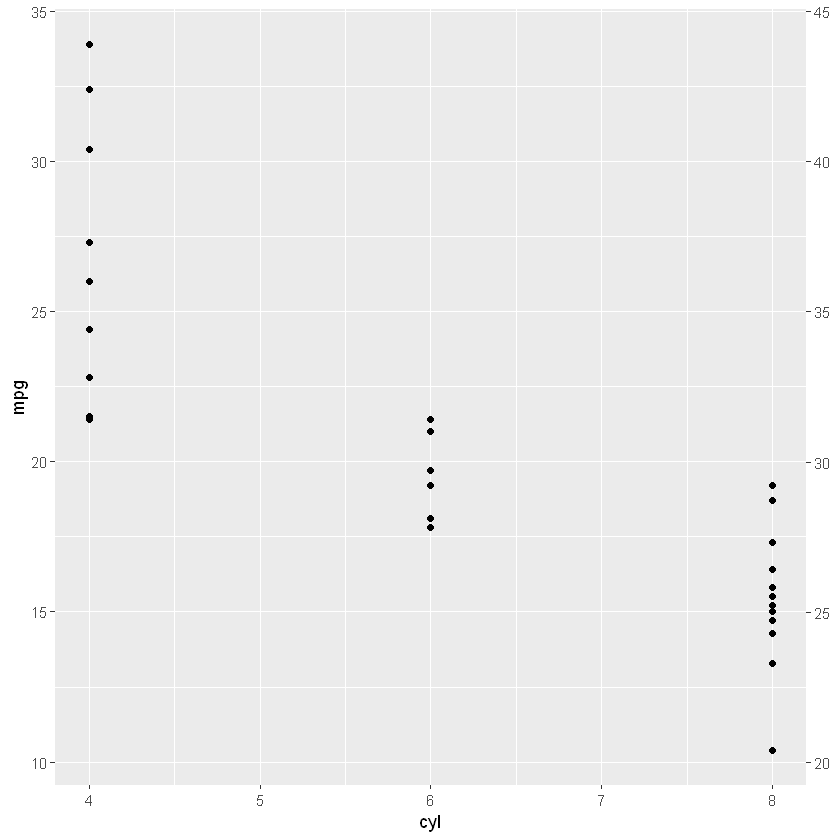

In [5]:
p <- ggplot(mtcars, aes(cyl, mpg)) +
  geom_point()

# Create a simple secondary axis
p + scale_y_continuous(sec.axis = sec_axis(trans = ~ . + 10))

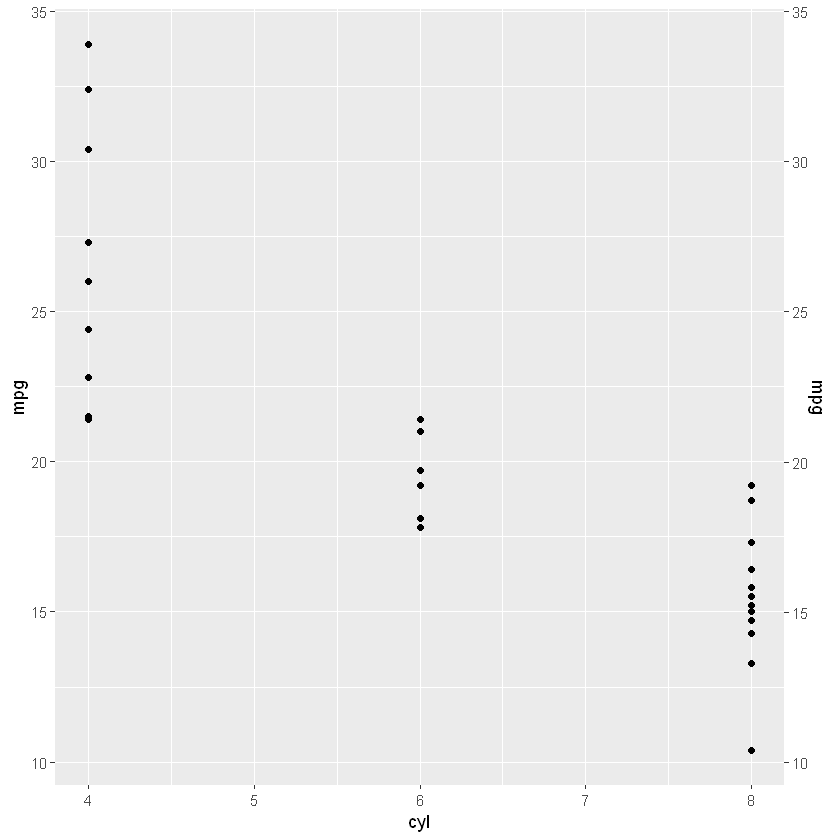

In [16]:
#inherit the name
p + scale_y_continuous(sec.axis = sec_axis(~ ., name = derive()))

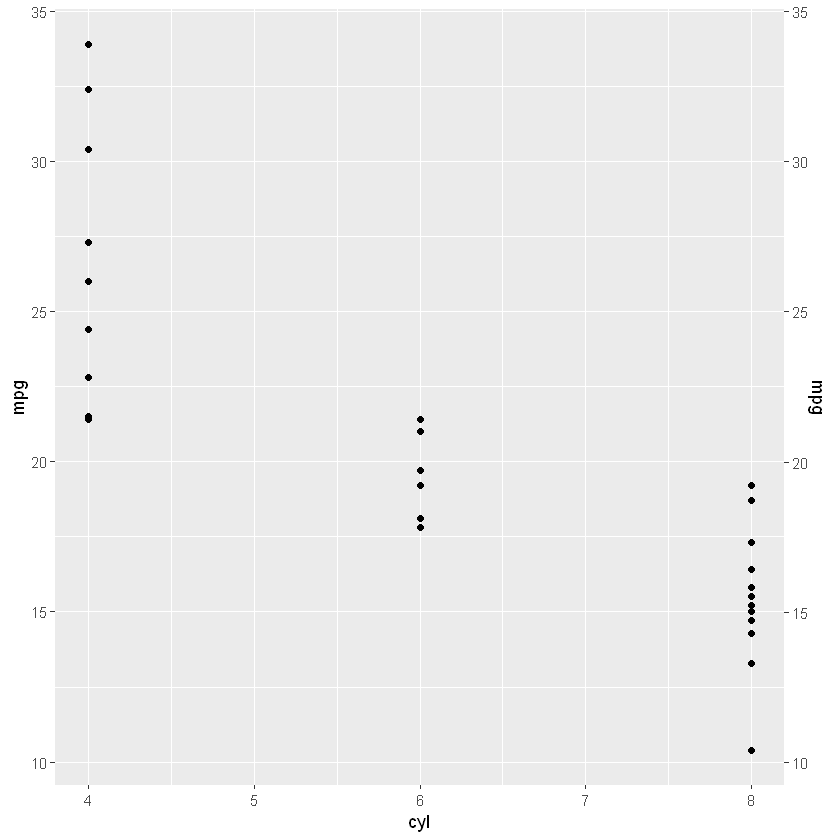

In [17]:
# Duplicate the primary axis
p + scale_y_continuous(sec.axis = dup_axis())

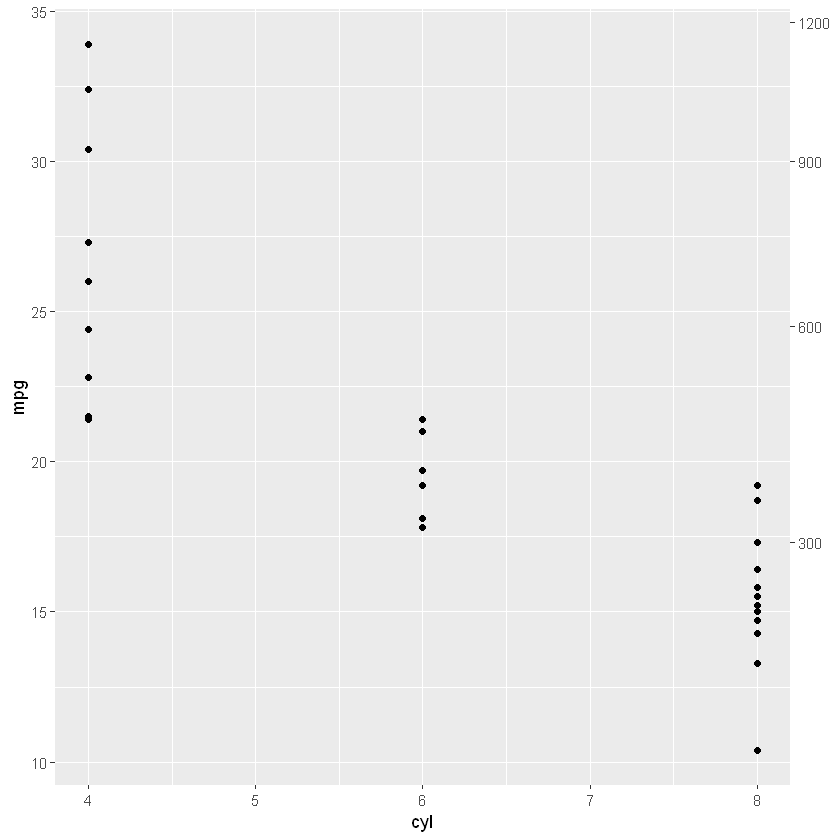

In [18]:
# You can pass in a formula as a shorthand
p + scale_y_continuous(sec.axis = ~ .^2)

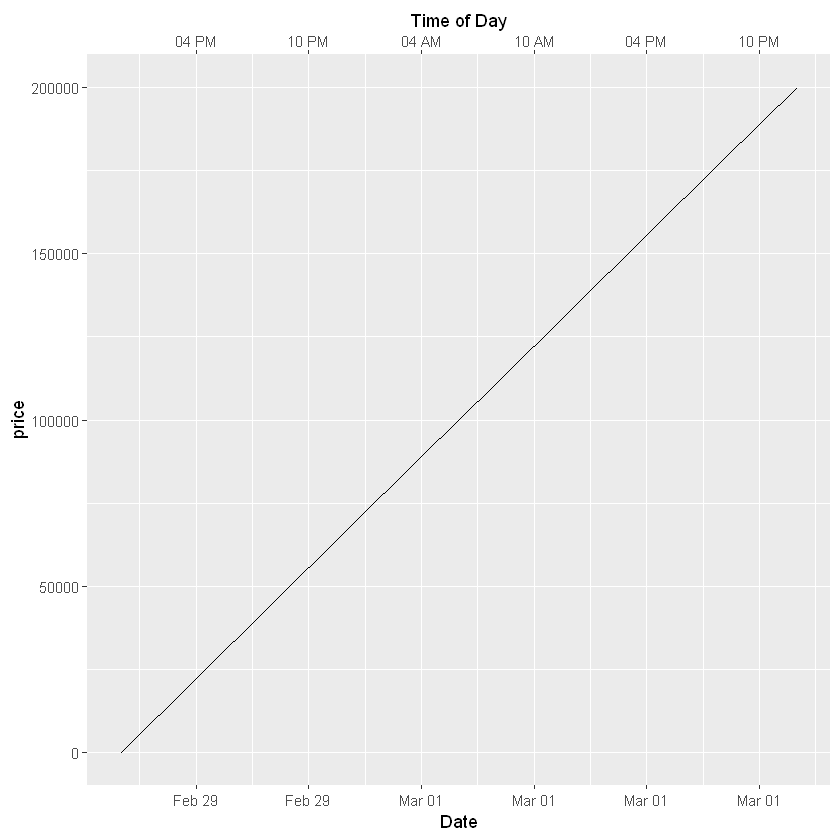

In [19]:
# Secondary axes work for date and datetime scales too:
df <- data.frame(
  dx = seq(as.POSIXct("2012-02-29 12:00:00",
                       tz = "UTC",
                       format = "%Y-%m-%d %H:%M:%S"
  ),
  length.out = 10, by = "4 hour"
  ),
  price = seq(20, 200000, length.out = 10)
 )

# This may useful for labelling different time scales in the same plot
ggplot(df, aes(x = dx, y = price)) + geom_line() +
  scale_x_datetime("Date", date_labels = "%b %d",
  date_breaks = "6 hour",
  sec.axis = dup_axis(name = "Time of Day",
  labels = scales::time_format("%I %p")))

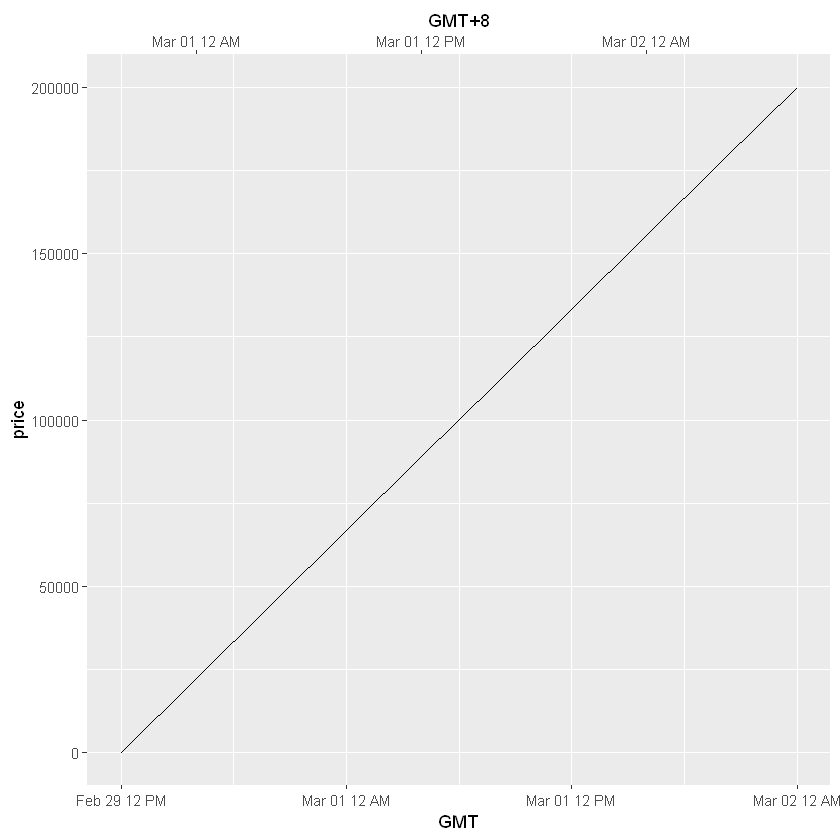

In [20]:

# or to transform axes for different timezones
ggplot(df, aes(x = dx, y = price)) + geom_line() +
  scale_x_datetime("GMT", date_labels = "%b %d %I %p",
  sec.axis = sec_axis(~ . + 8 * 3600, name = "GMT+8",
  labels = scales::time_format("%b %d %I %p")))